<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Faculty           5000 non-null   object 
 1   Department        5000 non-null   object 
 2   UTME_Score        5000 non-null   int64  
 3   UTME_Cutoff       5000 non-null   int64  
 4   Aggregate_Score   5000 non-null   float64
 5   Aggregate_Cutoff  5000 non-null   float64
 6   Olevel_Valid      5000 non-null   bool   
 7   Sittings          5000 non-null   int64  
 8   Admission_Status  5000 non-null   object 
 9   Olevel_Grades     5000 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 356.6+ KB


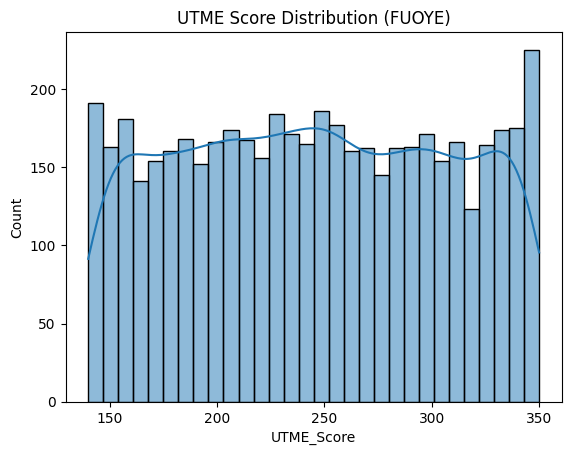

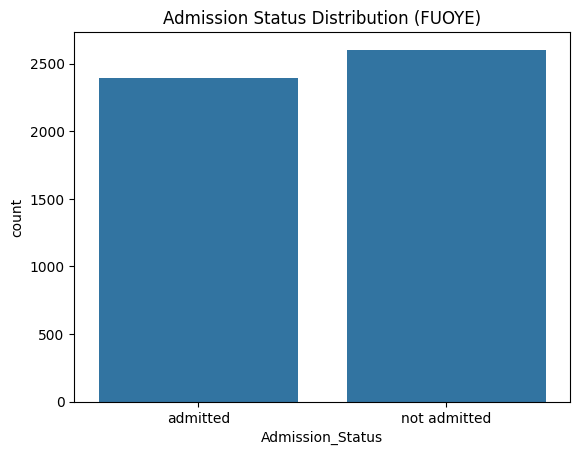

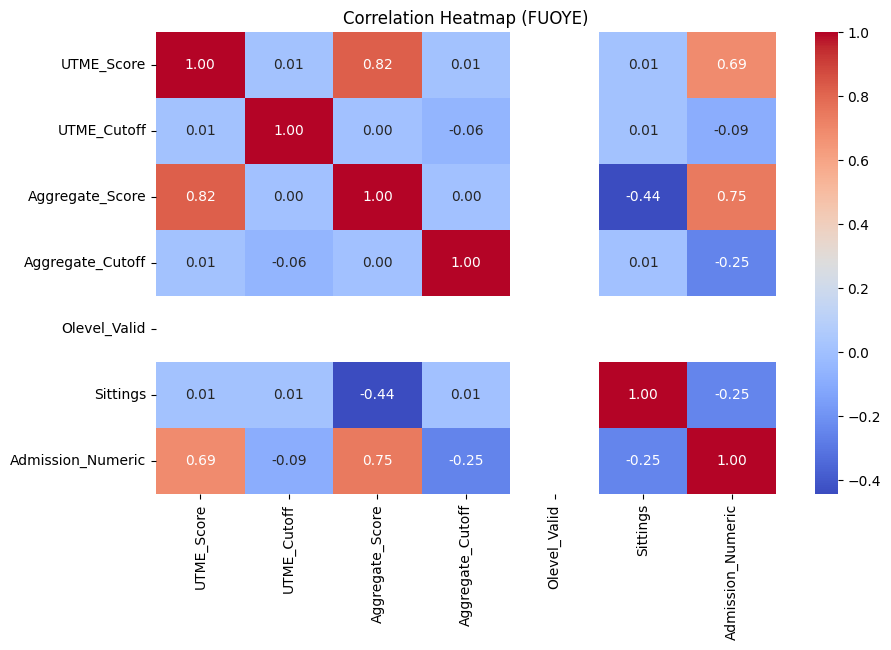

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

fuoye_df = pd.read_csv("../../Data/FUOYE.csv")
fuoye_df.head()
fuoye_df.info()
fuoye_df.describe()
fuoye_df.isnull().sum()
fuoye_df.duplicated().sum()

sns.histplot(fuoye_df['UTME_Score'], bins=30, kde=True)
plt.title("UTME Score Distribution (FUOYE)")
plt.show()

sns.countplot(x="Admission_Status", data=fuoye_df)
plt.title("Admission Status Distribution (FUOYE)")
plt.show()

#Admission Rate by Department
fuoye_df.groupby("Faculty")['Admission_Status'] \
    .value_counts(normalize=True) \
    .unstack()

#Encode Admission_Status
fuoye_df['Admission_Numeric'] = fuoye_df['Admission_Status'].map({
    "admitted": 1,
    "not admitted": 0
})

plt.figure(figsize=(10, 6))
sns.heatmap(
    fuoye_df.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap (FUOYE)")
plt.show()
